In [22]:
pwd

'C:\\Users\\Luciano'

Contact Compression
|PCount|Hw|Time|
|--|--|--|
|12.1|CPU|96.75|
|12.1|GTX1660Ti|96.75|
|12.1|GTX3090Ti||
|39.5|CPU||
|39.5|GTX1660Ti|297.0|
|39.5|GTX3090Ti||

Compression example (without contact):

|PCount[k]|Hw|OutFreq|Time[s]|
|--|--|--|--|
|11.3|CPU|x100|
|11.3|GTX1660Ti|x100|82.7|
|11.1|GTX3070|x100|45.0|
|39.5|CPU|x100||
|39.5|GTX1660Ti|x100|310.4|
|39.5|GTX3070|x100|136.0|
|120.0|CPU|x100||
|120.0|GTX1660Ti|x100|991.0|
|120.0|GTX3070|x100|405.0|

Compression example (without contact)

10 Output Writings

Windows 10 - VS 2022 - CUDA 12.1

threadsPerBlock: 256

[*] Estimated from 50% run

|PCount[k]|Hw|OutFreq|Time[s]|
|--|--|--|--|
|11.1|GTX1660Ti|x10|?|
|11.1|GTX3070|x10|35.0|
|11.3|Intel10700|x10|205.0|
|39.5|GTX1660Ti|x10|170.0|
|39.5|GTX3070|x10|105.0|
|39.5|Intel10700|x10|1000.0|
|120.0|GTX1660Ti|x10|602.0|
|120.0|GTX3070|x10|311.4|
|120.0|Intel10700|x10|4712.0|
|335.0|GTX1660Ti|x10|600.58|
|335.0|GTX3070|x10|1188.0|
|335.0|Intel10700|x10|4712.0|
|496.1|GTX1660Ti|x10|3550.0*|
|496.1|GTX3070|x10|1892.6|


/home/weldform-pc/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


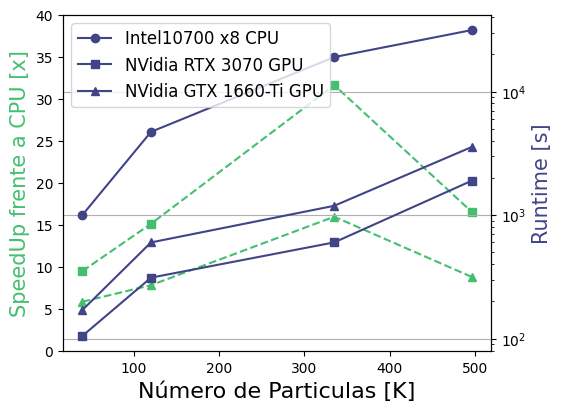

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([ 39.5,120.0,335.0,496.1])
y0 = np.array([ 0.0,0.0,0.0,0.0])
y1 = np.array([ 170.0,600.0,1188,3550.0]) #Ti1660
y2 = np.array([ 105.0,311.0,600.58,1892.6])
y3 = np.array([ 1000.0,4712,19000,31400])
y2_sup = y3/y1
y3_sup = y3/y2

fig, host = plt.subplots(figsize=(5.5,4), layout='constrained') # (width, height) in inches

ax2 = host.twinx()

plt.legend(["This is my legend"], fontsize="x-large")
#plt.title('WeldForm GPU Performance', fontsize=15)


color1, color2 = plt.cm.viridis([0.2,0.7])
host.set_ylabel("SpeedUp frente a CPU [x]", fontsize=15, color = color2)
host.set_ylim(0, 40)

#for tick in ax2.xaxis.get_major_ticks():
#  tick.label.set_fontsize(14) 

host.set_xlabel('Número de Particulas [K]', fontsize=16)
plt.ylabel('Runtime [s]', fontsize=15, color=color1)
plt.yscale("log")
plt.plot(x, y3, label = 'Intel10700 x8 CPU', color=color1, marker = 'o')  # note a[0] instead of a
plt.plot(x, y2, label = 'NVidia RTX 3070 GPU', color=color1, marker = 's')  # note a[0] instead of a
plt.plot(x, y1, label = 'NVidia GTX 1660-Ti GPU', color=color1, marker = '^')  # note a[0] instead of a

host.plot(x, y2_sup, label = 'NVidia GTX 1660-Ti GPU', color=color2, marker = '^',linestyle='dashed')  # note a[0] instead of a
host.plot(x, y3_sup, label = 'NVidia RTX 3070 GPU', color=color2, marker = 's', linestyle='dashed')  # note a[0] instead of a

#Legend is after labels
plt.legend(loc='upper left', fontsize = '12')
#plt.legend(loc='upper left', fontsize = '12')

plt.grid()

#plt.gcf().set_size_inches(10, 3)
plt.savefig("speedup.png")

plt.show() 

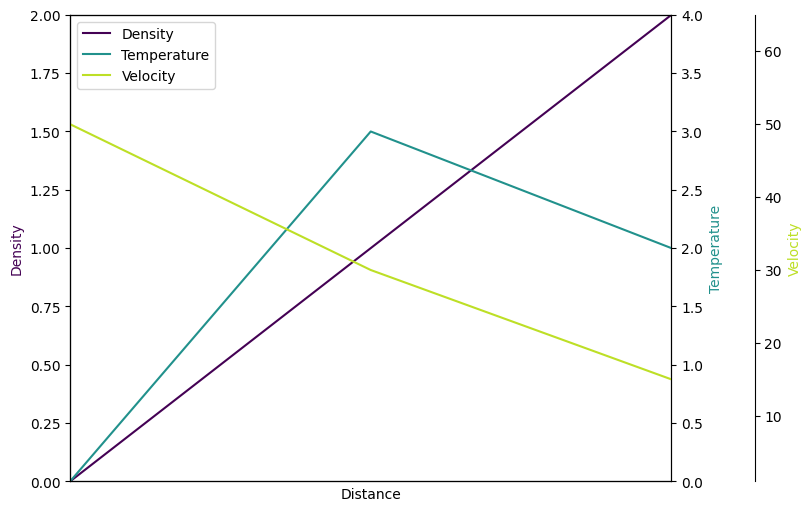

In [6]:
import matplotlib.pyplot as plt 

# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(8,5), layout='constrained') # (width, height) in inches
# (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html and
# .. https://matplotlib.org/stable/tutorials/intermediate/constrainedlayout_guide.html)
    
ax2 = host.twinx()
ax3 = host.twinx()
    
host.set_xlim(0, 2)
host.set_ylim(0, 2)
ax2.set_ylim(0, 4)
ax3.set_ylim(1, 65)
    
host.set_xlabel("Distance")
host.set_ylabel("Density")
ax2.set_ylabel("Temperature")
ax3.set_ylabel("Velocity")

color1, color2, color3 = plt.cm.viridis([0, .5, .9])

p1 = host.plot([0, 1, 2], [0, 1, 2],    color=color1, label="Density")
p2 = ax2.plot( [0, 1, 2], [0, 3, 2],    color=color2, label="Temperature")
p3 = ax3.plot( [0, 1, 2], [50, 30, 15], color=color3, label="Velocity")

host.legend(handles=p1+p2+p3, loc='best')

# right, left, top, bottom
ax3.spines['right'].set_position(('outward', 60))

# no x-ticks                 
host.xaxis.set_ticks([])

# Alternatively (more verbose):
# host.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off)
#     labelbottom=False) # labels along the bottom edge are off
# sometimes handy:  direction='in'    

# Move "Velocity"-axis to the left
# ax3.spines['left'].set_position(('outward', 60))
# ax3.spines['left'].set_visible(True)
# ax3.spines['right'].set_visible(False)
# ax3.yaxis.set_label_position('left')
# ax3.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(p1[0].get_color())
ax2.yaxis.label.set_color(p2[0].get_color())
ax3.yaxis.label.set_color(p3[0].get_color())

# For professional typesetting, e.g. LaTeX, use .pgf or .pdf
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=300)'
plt.savefig("pyplot_multiple_y-axis.pdf", bbox_inches='tight')
# bbox_inches='tight': Try to strip excess whitespace
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html